In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
import os
import cv2

data_path = 'train'
image_files = [os.path.join(data_path, f) for f in os.listdir(data_path)]
images = []
for file in image_files:
    img = cv2.imread(file)
    images.append(img)

In [5]:
images = pd.Series(images)

In [ ]:
train_df = train_df.merge(images.to_frame('Image'), left_index=True, right_index=True)

In [8]:
train_df

,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price,Image
0,1,4,4.0,4053,33.6968,-111.8892,869500,"[[[100, 126, 156], [110, 137, 164], [127, 154,..."
1,2,4,3.0,3343,34.8280,-119.0349,865200,"[[[174, 203, 217], [167, 196, 210], [159, 188,..."
2,3,3,4.0,3923,33.7669,-111.9182,889000,"[[[131, 147, 159], [132, 148, 160], [132, 148,..."
3,4,5,5.0,4022,33.7752,-111.7791,910000,"[[[105, 145, 170], [101, 141, 166], [108, 149,..."
4,5,3,4.0,4116,33.7669,-111.9182,971226,"[[[37, 105, 170], [37, 105, 170], [37, 105, 17..."
...,...,...,...,...,...,...,...,...
495,496,2,2.0,1257,35.6406,-120.7003,380000,"[[[223, 214, 205], [230, 221, 212], [228, 217,..."
496,497,4,2.0,2072,35.6406,-120.7003,429900,"[[[253, 253, 253], [252, 252, 252], [250, 250,..."
497,498,2,2.0,2213,35.6406,-120.7003,585000,"[[[136, 159, 181], [137, 160, 182], [141, 162,..."
498,499,3,2.5,1500,35.6406,-120.7003,319000,"[[[29, 33, 38], [25, 29, 34], [21, 25, 30], [1..."


In [9]:
train_df.info()
train_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   House ID   500 non-null    int64  
 1   Bedrooms   500 non-null    int64  
 2   Bathrooms  500 non-null    float64
 3   Area       500 non-null    int64  
 4   Latitude   500 non-null    float64
 5   Longitude  500 non-null    float64
 6   Price      500 non-null    int64  
 7   Image      500 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 31.4+ KB


,House ID,Bedrooms,Bathrooms,Area,Latitude,Longitude,Price
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,5.000000e+02
mean,250.500000,3.350000,2.669500,2369.64600,35.128844,-116.469049,5.980218e+05
std,144.481833,1.172283,1.017578,1208.18261,2.386173,6.554434,5.240649e+05
min,1.000000,1.000000,1.000000,701.00000,32.631500,-122.368300,2.200000e+04
25%,125.750000,2.000000,2.000000,1440.00000,33.808200,-119.802500,2.350000e+05
50%,250.500000,3.000000,2.500000,2097.50000,33.920800,-117.609600,5.300000e+05
75%,375.250000,4.000000,3.000000,3104.50000,35.640600,-116.371300,7.490000e+05
max,500.000000,10.000000,7.000000,9583.00000,47.791800,-87.885900,5.858000e+06


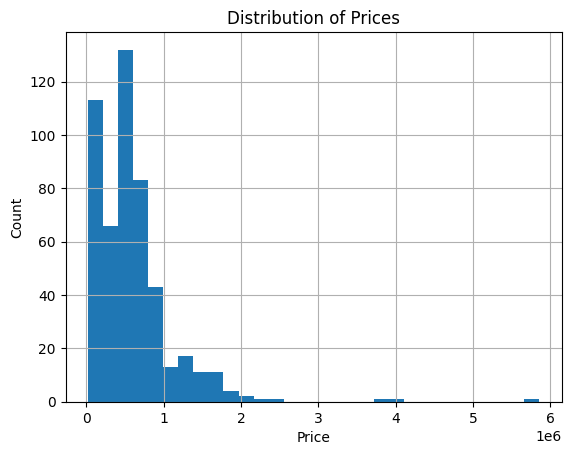

In [10]:
import matplotlib.pyplot as plt
train_df['Price'].hist(bins=30)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


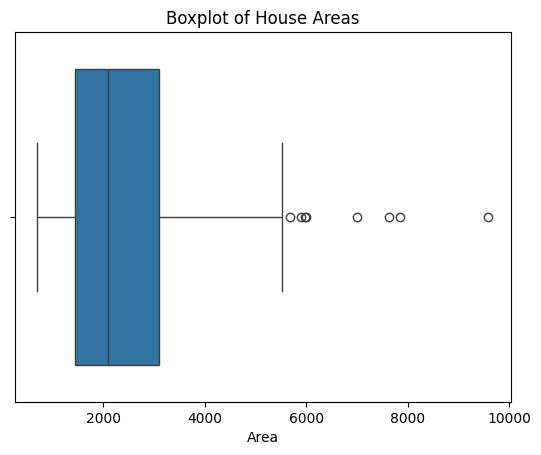

In [11]:
import seaborn as sns
sns.boxplot(x=train_df['Area'])
plt.title("Boxplot of House Areas")
plt.show()


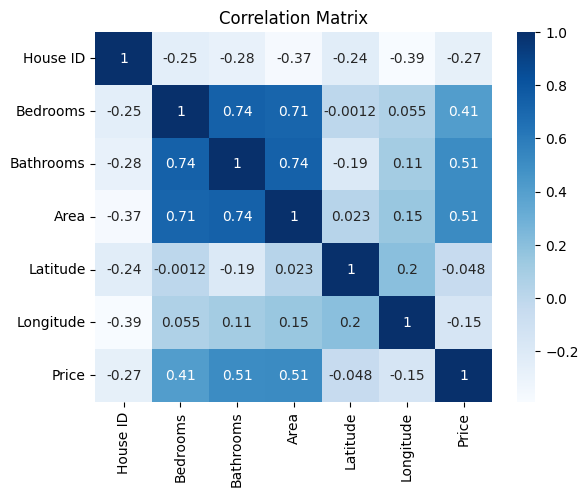

In [12]:
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


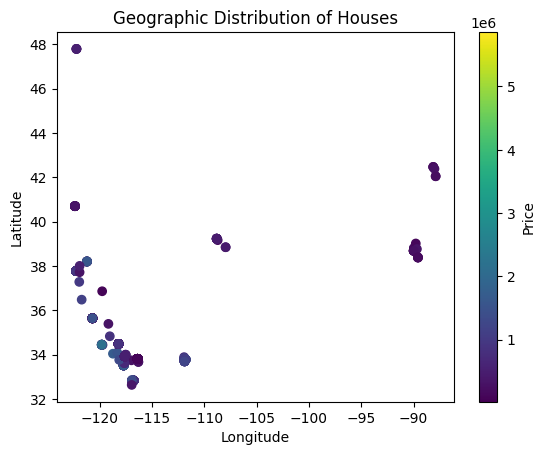

In [13]:
plt.scatter(train_df['Longitude'], train_df['Latitude'], 
            c=train_df['Price'], cmap='viridis')
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Geographic Distribution of Houses")
plt.show()
